In [2]:
import torch
from time import time
import warnings
import numpy as np
import torch.nn as nn

from torch.utils.data import DataLoader
from datasets.cityscapes import CityScapes
from tqdm import tqdm
from PIL import Image
from fvcore.nn import FlopCountAnalysis, flop_count_table

from models.bisenet.build_bisenet import BiSeNet
from utils import fast_hist, per_class_iou

warnings.filterwarnings("ignore")

In [2]:
## Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)

# Set model to training mode
model.train()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', label_raw=False)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Training loop
for epoch in range(50):
    model.train()
    hist = np.zeros((19, 19))
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        images = images.to(device)
        label = labels.to(device)

        optimizer.zero_grad()

        output = model(images)[0]
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        # Compute the predictions (1, 128, 256)
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet.pth')

100%|██████████| 16/16 [00:19<00:00,  1.21s/it]


Epoch: 0, Loss: 2.3940744400024414, mIoU: 0.03291184443231984


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 1, Loss: 1.9087514877319336, mIoU: 0.10823097226254551


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 2, Loss: 1.5605841875076294, mIoU: 0.1437878267525859


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 3, Loss: 1.2964884042739868, mIoU: 0.16015784136339792


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 4, Loss: 1.3291829824447632, mIoU: 0.17201933563206515


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 5, Loss: 1.2005163431167603, mIoU: 0.17714036314244913


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 6, Loss: 1.066785454750061, mIoU: 0.1888995475322777


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 7, Loss: 1.1210360527038574, mIoU: 0.1928404577234141


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 8, Loss: 0.9900414347648621, mIoU: 0.19553922136879745


100%|██████████| 16/16 [00:19<00:00,  1.21s/it]


Epoch: 9, Loss: 1.0068385601043701, mIoU: 0.20220385905421318


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 10, Loss: 0.9151617288589478, mIoU: 0.2119390803198503


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 11, Loss: 0.9743016362190247, mIoU: 0.21231291482410247


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 12, Loss: 0.8649351596832275, mIoU: 0.21755628450273887


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 13, Loss: 0.8587014079093933, mIoU: 0.22366431517819146


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 14, Loss: 0.8634025454521179, mIoU: 0.22415157612871695


100%|██████████| 16/16 [00:19<00:00,  1.24s/it]


Epoch: 15, Loss: 0.8770114183425903, mIoU: 0.2283377704106991


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 16, Loss: 0.8843176960945129, mIoU: 0.23303383737061945


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 17, Loss: 0.8660330772399902, mIoU: 0.23953300052039178


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 18, Loss: 0.7996498942375183, mIoU: 0.24279177759670473


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 19, Loss: 0.8835527896881104, mIoU: 0.24446706811075555


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 20, Loss: 0.795538604259491, mIoU: 0.24972563643882845


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 21, Loss: 0.8469123244285583, mIoU: 0.25232538710894


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 22, Loss: 0.7484924793243408, mIoU: 0.25665442292215773


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 23, Loss: 0.8463834524154663, mIoU: 0.2611102401005914


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 24, Loss: 0.7947937250137329, mIoU: 0.261678803394658


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 25, Loss: 0.775691568851471, mIoU: 0.2648864517546488


100%|██████████| 16/16 [00:19<00:00,  1.24s/it]


Epoch: 26, Loss: 0.7799100875854492, mIoU: 0.2651774254657133


100%|██████████| 16/16 [00:19<00:00,  1.21s/it]


Epoch: 27, Loss: 0.8338274359703064, mIoU: 0.2706760902023985


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 28, Loss: 0.7817842960357666, mIoU: 0.27407495794001024


100%|██████████| 16/16 [00:18<00:00,  1.16s/it]


Epoch: 29, Loss: 0.7893708944320679, mIoU: 0.27791835638654794


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 30, Loss: 0.7459430694580078, mIoU: 0.278645590901403


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 31, Loss: 0.747011661529541, mIoU: 0.28229307573400325


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 32, Loss: 0.7610889673233032, mIoU: 0.2829949664353156


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 33, Loss: 0.7557846307754517, mIoU: 0.2845770434294806


100%|██████████| 16/16 [00:18<00:00,  1.16s/it]


Epoch: 34, Loss: 0.7250819206237793, mIoU: 0.28791574133387693


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 35, Loss: 0.7590726017951965, mIoU: 0.289928833487094


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 36, Loss: 0.747730553150177, mIoU: 0.29121678934935674


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 37, Loss: 0.7578728795051575, mIoU: 0.29106986471253377


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 38, Loss: 0.724193274974823, mIoU: 0.2956372394132163


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 39, Loss: 0.7066031694412231, mIoU: 0.29763840040779654


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 40, Loss: 0.6600345969200134, mIoU: 0.2970883704785299


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 41, Loss: 0.7510977983474731, mIoU: 0.2978392828599822


100%|██████████| 16/16 [00:18<00:00,  1.17s/it]


Epoch: 42, Loss: 0.6945257782936096, mIoU: 0.3041240555859741


100%|██████████| 16/16 [00:19<00:00,  1.24s/it]


Epoch: 43, Loss: 0.6808634400367737, mIoU: 0.302422887872338


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 44, Loss: 0.7070639133453369, mIoU: 0.302945021693918


100%|██████████| 16/16 [00:19<00:00,  1.24s/it]


Epoch: 45, Loss: 0.7080540657043457, mIoU: 0.3062483144065511


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 46, Loss: 0.7627612948417664, mIoU: 0.3048410292335456


100%|██████████| 16/16 [00:19<00:00,  1.22s/it]


Epoch: 47, Loss: 0.7491672039031982, mIoU: 0.30645078186003344


100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Epoch: 48, Loss: 0.7388772964477539, mIoU: 0.3095554437130845


100%|██████████| 16/16 [00:19<00:00,  1.23s/it]


Epoch: 49, Loss: 0.6379656791687012, mIoU: 0.31314529862923635


In [3]:
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))

# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', label_raw=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    images = images.to(device)
    label = labels.to(device)
    output = model(images)[0]

    # Compute the predictions (1, 128, 256)
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))

print(f'mIoU: {miou}')


100%|██████████| 500/500 [00:19<00:00, 26.26it/s]

mIoU: 0.32570253415869516


### Example

0it [00:00, ?it/s]


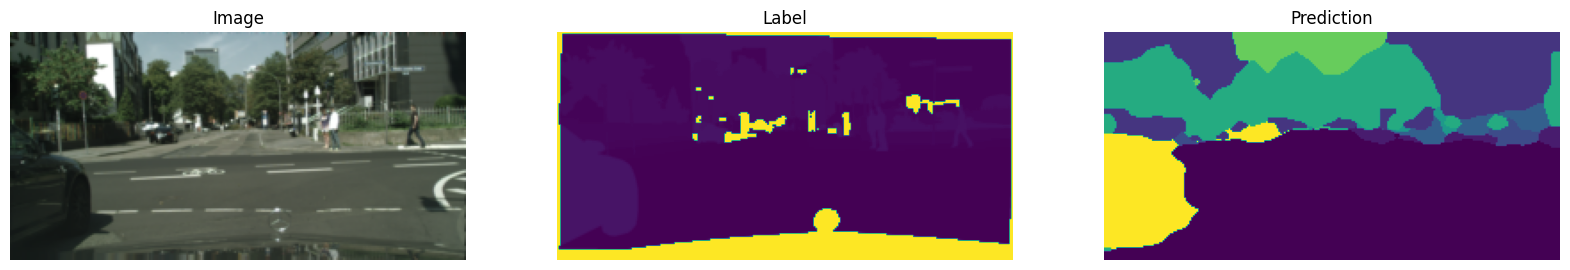

In [3]:
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))

# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', label_raw=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

hist = np.zeros((19, 19))
for i, (image, label) in tqdm(enumerate(dataloader)):
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # output shape: (1, 19, 128, 256)
    # label shape: (1, 128, 256)
    # Compute the predictions (1, 128, 256)
    pred = output.argmax(dim=1)
    break

# Display the image
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image)
plt.title('Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(133)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()


### FLOPs and Parameters

In [5]:
# Get the device
device = torch.device("cpu")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))

# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', label_raw=False)

# Get the image and label
image, label = dataset[0]

# Compute the number of flops
flops = FlopCountAnalysis(model, image.unsqueeze(0))
# Get the number of flops
flops = flop_count_table(flops)

# Get the number of parameters
params = sum(p.numel() for p in model.parameters())

print(f'Number of parameters: {params}\n')
print(flops)

Number of parameters: 50801192

| module                                      | #parameters or shape   | #flops     |
|:--------------------------------------------|:-----------------------|:-----------|
| model                                       | 50.801M                | 5.75G      |
|  saptial_path                               |  0.371M                |  0.318G    |
|   saptial_path.convblock1                   |   1.856K               |   15.204M  |
|    saptial_path.convblock1.conv1            |    1.728K              |    14.156M |
|    saptial_path.convblock1.bn               |    0.128K              |    1.049M  |
|   saptial_path.convblock2                   |   73.984K              |   0.152G   |
|    saptial_path.convblock2.conv1            |    73.728K             |    0.151G  |
|    saptial_path.convblock2.bn               |    0.256K              |    0.524M  |
|   saptial_path.convblock3                   |   0.295M               |   0.151G   |
|    saptial_path.conv

### Latency and FPS

In [7]:
# Get the device
device = torch.device("cpu")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', label_raw=False)


# Get the image and label
image, label = dataset[0]

# Compute the latency and FPS
iterations = 1000
latency = []
fps = []

for _ in range(iterations):
    start = time()
    model(image.unsqueeze(0))
    end = time()
    latency.append(end - start)
    fps.append(1 / (end - start))

# Compute the average latency and FPS
mean_latency = np.mean(latency)
mean_fps = np.mean(fps)
std_latency = np.std(latency)
std_fps = np.std(fps)

print(f'Latency: {mean_latency:.3f} +/- {std_latency:.3f}')
print(f'FPS: {mean_fps:.3f} +/- {std_fps:.3f}')


Latency: 0.048 +/- 0.002
FPS: 20.876 +/- 0.962
